JMG Good hard work.  So,e comments below.  Search for JMG.

# Information on the project methodology 

For the purpose of this project, I divide the project into two different analysis. In the first analysis, I only focused on firstname and surname (meaning all my character names are consisted of two parts like: "Lady Bennet". )
I did the analysis seperately for War and Peace (often refered to as WP) and Pride and Prejudice (PP). 
Then I did another round of text analysis and imagined if characters have only 1 part names like ( Kate or Bennette) and tried to identify characters. 
At the end I drew my conclusions on character and gender dominance in both novels. 

In [2]:
import urllib
import nltk
from collections import Counter
import matplotlib.pyplot as plt
import pylab
import re
from nltk.corpus import stopwords
import pandas as pd

 # Pride and Prejudice
 
 ## First Analysis: Double Capital Name Characters

In [3]:
#opening books URLs* pp: pride and prejudice

data_pp = urllib.request.urlopen('https://www.gutenberg.org/files/1342/1342-0.txt')

text_pp = ''
for line in data_pp: 
    text_pp +=line.decode("utf-8")
    

Next step is to tokenize the text. I defined tokenize function which basically turns the text into tokens. 
I also used stopwords from NLTK to avoid English stopwords such as It, This, The, ... in character analysis.
I could use nltk.word_tokenize() too but prefered nltk.sent_tokenize(), because it tokenize into sentences and its easier to find double capital words. 

In [4]:
nltk.download("punkt")
nltk.download('stopwords')

stops = set(stopwords.words('english'))


def tokenize(i):
    tokens = nltk.sent_tokenize(i)
    return tokens 

[nltk_data] Downloading package punkt to /Users/gawron/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gawron/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Frequency Table 

So in the next cell, I am gradually developing functions to get the frequency table. So basically Capital_words gives us all capital words in the middle of the sentence (which right now we dont want to use because we are focusing on double capital words.) Double_capital_words is the function that we need to get all the double capital words. we use that in frequency function to get double capitals as well as their frequency, this function also sorts the characters by their frequency (descending). Eventually we get to develop top_50 function to use it for the frequency_table created by Pandas dataframe. 
So just by running frequency_table function for our text, we get to see top 50 charactes frequency in every book.

In [7]:
def capital_words(i):
    cap_words = []
    for s in tokenize(i):
        for w in re.findall(r'(?<!\.\s)\b[A-Z][a-z]*\b', s):
            if w.lower() not in stops:
                cap_words.append(w)
    return cap_words

def double_capital_words(i):
    double_cap_words = []
    for s in tokenize(i):
        for w in re.findall('([A-Z]\w+ [A-Z]\w+)', s):
            if all(token not in stops for token in w.lower().split()):
                double_cap_words.append(w)
    return double_cap_words


def frequency(i):
    freq = Counter(double_capital_words(i))
    sorted_freq = dict(sorted(freq.items(), key=lambda item: item[1], reverse=True))
    return sorted_freq


def top_50(i):  
    capitals_frequency_items = frequency(i).items()
    top = list(capitals_frequency_items)[:50]
    return top
 
def frequency_table(i):
    df = pd.DataFrame (top_50(i), columns = ['Character', 'Frequency'])
    print(df)


def calculate_frequency(text, character):
    freq = frequency(text)
    if character in freq.keys():
        return freq[character]
    else:
        return 0 
    

frequency_table(text_pp)




               Character  Frequency
0         Lady Catherine        101
1           Miss Bingley         77
2      Project Gutenberg         64
3            Miss Bennet         60
4            Sir William         41
5             Miss Darcy         33
6    Colonel Fitzwilliam         25
7             Miss Lucas         22
8        Colonel Forster         20
9             Lady Lucas         16
10         United States         13
11        Miss Elizabeth         12
12    Archive Foundation         10
13            Miss Eliza          8
14    Gracechurch Street          8
15       Charlotte Lucas          7
16           Lucas Lodge          6
17          Miss Bennets          6
18    Gutenberg Literary          6
19        George Wickham          5
20             Miss King          4
21        Captain Carter          4
22          Rosings Park          3
23            Miss Lydia          3
24       Pemberley House          3
25       Longbourn House          3
26           Good Heaven    

### Creating Chunks 

Moving on to the next step, now we need to create 3000 word chunks for character and gender dominance analysis. So this chunks function gets any text(k) and number of words(chunk length) and give us chunks with the prefered length. Since we were asked to select 3000 word chunks, at first step I decided to put num=3000 and my text is pride and prejudice of course. 

JMG chars_freq_chunk is nit defined until the next cell.

In [11]:
def chunks(text, n):
    word_list = text.split()
    chunk = []
    for y in range(0, len(word_list), n):
        chunk.append(" ".join((word_list[y:y+n])))
    return (chunk)

pp_chunk = chunks(text_pp,3000)
all_chars_pp = frequency(text_pp)
chars_freq_pp = chars_freq_chunk(text_pp,3000)




### Creating plot for top 5 characters per chunk

Now that we have chunk function, we can basically turn any text into desired chunks. In next cell I tried to visualize number of occurences of top 5 characters per each chunk, I set y axis limit to 20 because most numbers were under 20 so we can see data better. 
I defined a function to calculate word frequency in each desired text chunk. Next we get to see top 5 characters per chunks. 

In [10]:
all_chars_pp = frequency(text_pp)


def chars_freq_chunk(text,n):
    chunks_num = [0]*len(chunks(text,n))
    all_chars = frequency(text)
    chars_freq_chunk = {}
    for key in frequency(text).keys():
        chars_freq_chunk[key] = [0] * len(chunks_num)
        for i in range(len(chunks_num)):
            chars_freq_chunk[key][i] = calculate_frequency(chunks(text,n)[i], key)
    return chars_freq_chunk

In [16]:
chars_freq_pp = chars_freq_chunk(text_pp,3000)

In [12]:


chunks_num = [0]*len(pp_chunk)
top_5 = []
count = 0
for i in top_50(text_pp):
        top_5.append(i[0])
        count +=1
        if count >5:
            break


top5_freq_per_chunk = {}
for j in top_5:
    top5_freq_per_chunk[j] = [0]*len(chunks(text_pp,3000))
    for i in range(len(chunks_num)):
        top5_freq_per_chunk[j][i] = calculate_frequency(pp_chunk[i],j)


top5_freq_per_chunk

if 'Project Gutenberg' in top5_freq_per_chunk:
    del top5_freq_per_chunk['Project Gutenberg']

So I once calculated top 5 and saw we have Project Gutenberg listed in top-5. I omitted it because it was nosiy.


JMG The choice of scatterplot makes the facts hard to see.

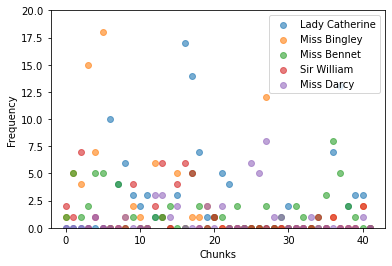

In [13]:
x=[]
for i in range(0,len(pp_chunk)):
    x.append(i)

for character in top5_freq_per_chunk.keys():
    y = top5_freq_per_chunk[character]

    plt.scatter(x,y, alpha=0.6, label=character)
    plt.ylim(0,20)
    plt.xlabel('Chunks')
    plt.ylabel('Frequency')
plt.legend()

### Distinguish Male and Female Name

Since we had ALOT of names from 1880 to 2011, running the code for all baby names would take forever. To accelerate running time, since both Pride and Prejudice and War and Peace were written in 19th century, I created a names_19th dataframe to use for gender analysis to save some time. 
So apparently so many of names were used for both men and women. What I did was I calculated sum of birth each name per gender to see if that name is more common for one gender. 

JMG I caused the error below.  The Google Drive is not mounted. No problem.
I get the idea.

In [14]:
years = list(range(1880,2011))
pieces = []
columns = ['name','sex','births']
    
for year in years:
    path = f'names/yob{year:d}.txt'
    frame = pd.read_csv(path,names=columns)
    frame['year'] = year
    pieces.append(frame)    
    
names = pd.concat(pieces, ignore_index=True)
names_19th = names.loc[names['year'] < 1900]

FileNotFoundError: [Errno 2] No such file or directory: 'names/yob1880.txt'

In [50]:
gender = {}
for name in list(set(names_19th['name'])):
    if names_19th[names_19th['name']==name][names_19th['sex']=='F']['births'].sum() > names_19th[names_19th['name']==name][names_19th['sex']=='M']['births'].sum():
        gender[name] = 'F'
    else:
        gender[name] = 'M' 


/var/folders/xb/jk_mk5m90mnf77325jwrjx_00000gn/T/ipykernel_32749/1079198384.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if names_19th[names_19th['name']==name][names_19th['sex']=='F']['births'].sum() > names_19th[names_19th['name']==name][names_19th['sex']=='M']['births'].sum():


{'Melbourne': 'M',
 'Margarita': 'F',
 'Allan': 'M',
 'Adrian': 'M',
 'Lyn': 'M',
 'Lillain': 'F',
 'Lynda': 'F',
 'Admiral': 'M',
 'Crescentia': 'F',
 'Bengiman': 'M',
 'Augustin': 'M',
 'Dellar': 'F',
 'Keturah': 'F',
 'Leoma': 'F',
 'Gene': 'M',
 'Salena': 'F',
 'Osee': 'F',
 'Gisella': 'F',
 'Verdia': 'F',
 'Vadie': 'F',
 'Isma': 'F',
 'Orin': 'M',
 'Keith': 'M',
 'Charle': 'M',
 'Estill': 'M',
 'Joaquin': 'M',
 'Mariette': 'F',
 'Burley': 'M',
 'Lyla': 'F',
 'Eulalie': 'F',
 'Gunnar': 'M',
 'Hermione': 'F',
 'Miriam': 'F',
 'Jeff': 'M',
 'Algie': 'M',
 'Harmon': 'M',
 'Lelah': 'F',
 'Whit': 'M',
 'Florie': 'F',
 'Stena': 'F',
 'Isador': 'M',
 'Erma': 'F',
 'Veneta': 'F',
 'Reather': 'F',
 'Margueritte': 'F',
 'Elouise': 'F',
 'Bun': 'M',
 'Essie': 'F',
 'Alois': 'M',
 'Concepcion': 'F',
 'Job': 'M',
 'Mora': 'F',
 'Nola': 'F',
 'Payton': 'M',
 'Rodney': 'M',
 'Leonidas': 'M',
 'Sherwood': 'M',
 'Claude': 'M',
 'Olen': 'M',
 'Hubert': 'M',
 'Tom': 'M',
 'Bart': 'M',
 'Rillie': 'F',

In [63]:
gender['Miss'] = 'F'
gender['Mr'] = 'M'



In this cell we calculate gender domaninace, U stands for unknown which are mostly our noisy data. However I ran the gender dominance and found out we dont have Mr and Miss in the gender so I added them manually because they were very repeated. 

In [64]:
M = [0]* len(pp_chunk)
F = [0]* len(pp_chunk)
U = [0]* len(pp_chunk)
for character in all_chars_pp.keys():
    split_char = character.split(' ')
    selected_char = ''
    if split_char[0] in gender.keys():
        selected_char = split_char[0]
    elif split_char[1] in gender.keys():
        selected_char = split_char[1]
    if selected_char in gender.keys():
        if gender[selected_char] == 'M':
            for i in range(len(chars_freq_pp[character])):
                M[i] = M[i] + chars_freq_pp[character][i]
        elif gender[selected_char] == 'F':
             for i in range(len(chars_freq_pp[character])):
                F[i] = F[i] + chars_freq_pp[character][i]
    else:
        for i in range(len(chars_freq_pp[character])):
            U[i] = U[i] + chars_freq_pp[character][i]


Now its time to plot genders in chunks to see female vs. male gender dominance in the novel. Apparently female had gender dominance till the very end, but in the last chunks we see equal presence of males and females. (even more males at the very end)

<AxesSubplot:xlabel='Chunk Number'>

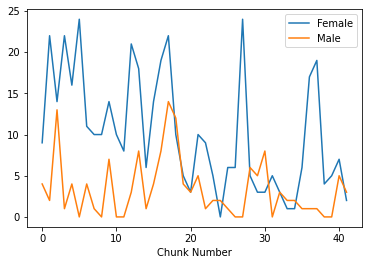

In [69]:

all_chunks = list(range(len(pp_chunk)))
df = pd.DataFrame({"Chunk Number":all_chunks, "Female": F, "Male": M})

df.plot(x="Chunk Number")

 ## Second Analysis: Single Capital Name Characters
    
In this section we only look for characters with one-part words. 

In [94]:
def frequency_single(i):
    freq = Counter(capital_words(i))
    sorted_freq = dict(sorted(freq.items(), key=lambda item: item[1], reverse=True))
    return sorted_freq


def top_50_single(i):  
    capitals_frequency_items = frequency_single(i).items()
    top = list(capitals_frequency_items)[:50]
    return top
 
def frequency_table_single(i):
    df = pd.DataFrame (top_50_single(i), columns = ['Character', 'Frequency'])
    print(df)


def calculate_frequency_single(text, character):
    freq = frequency_single(text)
    if character in freq.keys():
        return freq[character]
    else:
        return 0 
    
frequency_table_single(text_pp)

        Character  Frequency
0              Mr        784
1       Elizabeth        634
2             Mrs        344
3            Jane        294
4            Miss        281
5         Bingley        205
6           Darcy        173
7           Lydia        170
8            Lady        137
9         Wickham        128
10      Catherine        126
11        Chapter        122
12         Bennet        101
13          Lizzy         96
14             Oh         93
15      Longbourn         88
16      Charlotte         85
17        Project         84
18      Gutenberg         84
19    Netherfield         73
20          Kitty         71
21          Lucas         70
22        Colonel         63
23        Meryton         57
24            Yes         57
25         London         55
26      Pemberley         53
27            Sir         51
28        Rosings         49
29        William         45
30  Hertfordshire         41
31           Mary         39
32         Bourgh         39
33           W

In [95]:
chunks_num = [0]*len(pp_chunk)
top_5 = []
count = 0
for i in top_50_single(text_pp):
        top_5.append(i[0])
        count +=1
        if count >7:
            break


top5_freq_per_chunk_single = {}
for j in top_5:
    top5_freq_per_chunk_single[j] = [0]*len(chunks(text_pp,3000))
    for i in range(len(chunks_num)):
        top5_freq_per_chunk_single[j][i] = calculate_frequency_single(pp_chunk[i],j)


top5_freq_per_chunk_single

#if 'Mr' in top5_freq_per_chunk_single:
#    del top5_freq_per_chunk_single['Mr']
    
#if 'Mrs' in top5_freq_per_chunk_single:
#    del top5_freq_per_chunk_single['Mrs']
    
    
#if 'Miss' in top5_freq_per_chunk_single:
#    del top5_freq_per_chunk_single['Miss']

{'Mr': [39,
  19,
  23,
  17,
  22,
  22,
  27,
  45,
  45,
  36,
  38,
  27,
  19,
  23,
  27,
  9,
  17,
  21,
  21,
  18,
  15,
  24,
  11,
  12,
  10,
  11,
  17,
  14,
  10,
  9,
  15,
  11,
  13,
  14,
  17,
  13,
  8,
  10,
  6,
  18,
  11,
  0],
 'Elizabeth': [3,
  8,
  12,
  26,
  12,
  30,
  4,
  14,
  17,
  16,
  20,
  13,
  11,
  22,
  13,
  22,
  22,
  17,
  19,
  11,
  3,
  4,
  19,
  12,
  16,
  25,
  24,
  24,
  12,
  14,
  12,
  13,
  11,
  10,
  14,
  20,
  27,
  16,
  18,
  13,
  15,
  0],
 'Mrs': [15,
  13,
  5,
  6,
  11,
  7,
  10,
  14,
  7,
  0,
  13,
  10,
  3,
  11,
  15,
  6,
  7,
  14,
  6,
  2,
  1,
  6,
  9,
  7,
  10,
  14,
  9,
  12,
  6,
  6,
  9,
  9,
  12,
  2,
  12,
  15,
  11,
  2,
  3,
  7,
  7,
  0],
 'Jane': [4,
  13,
  11,
  12,
  7,
  9,
  3,
  6,
  6,
  5,
  7,
  4,
  13,
  15,
  15,
  11,
  0,
  1,
  4,
  5,
  1,
  6,
  12,
  11,
  2,
  0,
  2,
  0,
  7,
  12,
  7,
  11,
  7,
  5,
  10,
  11,
  16,
  1,
  9,
  7,
  6,
  0],
 'Miss': [2,
  18,

JMG With this many characters a scatterplot is too chaotic.
I would suggest one bar plot with narrow widths, one color
per character and probably a max of 5 characters.

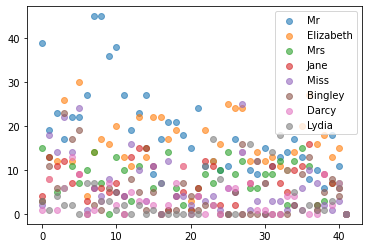

In [96]:
x=[]
for i in range(0,len(pp_chunk)):
    x.append(i)

for character in top5_freq_per_chunk_single.keys():
    y = top5_freq_per_chunk_single[character]

    plt.scatter(x,y, alpha=0.6, label=character)
plt.legend()

In [111]:
def chars_freq_chunk_single(text,n):
    chunks_num = [0]*len(chunks(text,n))
    all_chars = frequency_single(text)
    chars_freq_chunk = {}
    for key in frequency_single(text).keys():
        chars_freq_chunk[key] = [0] * len(chunks_num)
        for i in range(len(chunks_num)):
            chars_freq_chunk[key][i] = calculate_frequency_single(chunks(text,n)[i], key)
    return chars_freq_chunk

In [ ]:
chars_freq_pp_single = chars_freq_chunk_single(text_pp,3000)
all_chars_pp_single = frequency_single(text_pp)

M = [0]* len(pp_chunk)
F = [0]* len(pp_chunk)
U = [0]* len(pp_chunk)
if character in all_chars_pp_single.keys():
    for character in all_chars_pp_single.keys():
            if gender[character] == 'M':
                for i in range(len(chars_freq_pp_single[character])):
                    M[i] = M[i] + chars_freq_pp_single[character][i]
            elif gender[character] == 'F':
                 for i in range(len(chars_freq_pp_single[character])):
                    F[i] = F[i] + chars_freq_pp_single[character][i]
            else:
                for i in range(len(chars_freq_pp_single[character])):
                    U[i] = U[i] + chars_freq_pp_single[character][i]
else: 
    pass

In [113]:
all_chunks = list(range(len(pp_chunk)))
df = pd.DataFrame({"Chunk Number":all_chunks, "Female": F, "Male": M})

df.plot(x="Chunk Number")

{'Mr': [39,
  19,
  23,
  17,
  22,
  22,
  27,
  45,
  45,
  36,
  38,
  27,
  19,
  23,
  27,
  9,
  17,
  21,
  21,
  18,
  15,
  24,
  11,
  12,
  10,
  11,
  17,
  14,
  10,
  9,
  15,
  11,
  13,
  14,
  17,
  13,
  8,
  10,
  6,
  18,
  11,
  0],
 'Elizabeth': [3,
  8,
  12,
  26,
  12,
  30,
  4,
  14,
  17,
  16,
  20,
  13,
  11,
  22,
  13,
  22,
  22,
  17,
  19,
  11,
  3,
  4,
  19,
  12,
  16,
  25,
  24,
  24,
  12,
  14,
  12,
  13,
  11,
  10,
  14,
  20,
  27,
  16,
  18,
  13,
  15,
  0],
 'Mrs': [15,
  13,
  5,
  6,
  11,
  7,
  10,
  14,
  7,
  0,
  13,
  10,
  3,
  11,
  15,
  6,
  7,
  14,
  6,
  2,
  1,
  6,
  9,
  7,
  10,
  14,
  9,
  12,
  6,
  6,
  9,
  9,
  12,
  2,
  12,
  15,
  11,
  2,
  3,
  7,
  7,
  0],
 'Jane': [4,
  13,
  11,
  12,
  7,
  9,
  3,
  6,
  6,
  5,
  7,
  4,
  13,
  15,
  15,
  11,
  0,
  1,
  4,
  5,
  1,
  6,
  12,
  11,
  2,
  0,
  2,
  0,
  7,
  12,
  7,
  11,
  7,
  5,
  10,
  11,
  16,
  1,
  9,
  7,
  6,
  0],
 'Miss': [2,
  18,

## War and Peace

Good news is that because we had functions for frequency calculations, we can just go on and use frequency_table function to get frequency of top 50 characters in the book. 

### First Analysis: Double Capital Words


In [98]:
#opening books URLs* wp: war and peace

data_wp = urllib.request.urlopen('https://www.gutenberg.org/files/2600/2600-0.txt')

text_wp = ''
for line in data_wp: 
    text_wp +=line.decode("utf-8")

In [99]:
frequency_table(text_wp)

                 Character  Frequency
0            Prince Andrew        954
1            Princess Mary        465
2            Prince Vasíli        188
3            Anna Pávlovna        130
4   Mademoiselle Bourienne        100
5         Anna Mikháylovna         98
6         Márya Dmítrievna         86
7        Project Gutenberg         64
8               Bald Hills         57
9            Countess Mary         48
10        Count Rostopchín         42
11        Prince Bagratión         41
12       Emperor Alexander         37
13              CHAPTER II         34
14             CHAPTER III         34
15              CHAPTER IV         34
16              CHAPTER VI         34
17             CHAPTER VII         34
18            CHAPTER VIII         34
19              CHAPTER IX         34
20              CHAPTER XI         34
21             CHAPTER XII         34
22            CHAPTER XIII         32
23             CHAPTER XIV         30
24              CHAPTER XV         30
25          

In [101]:
chars_freq_wp = chars_freq_chunk(text_wp,3000)



KeyboardInterrupt: 

In [100]:
all_chars_wp = frequency(text_wp)
wp_chunk = chunks(text_wp,3000)



chunks_num = [0]*len(wp_chunk)
top_5 = []
count = 0
for i in top_50(text_wp):
        top_5.append(i[0])
        count +=1
        if count >5:
            break


top5_freq_per_chunk = {}
for j in top_5:
    top5_freq_per_chunk[j] = [0]*len(chunks(text_wp,3000))
    for i in range(len(chunks_num)):
        top5_freq_per_chunk[j][i] = calculate_frequency(wp_chunk[i],j)


top5_freq_per_chunk



KeyboardInterrupt: 

In [ ]:
x=[]
for i in range(0,len(wp_chunk)):
    x.append(i)

for character in top5_freq_per_chunk.keys():
    y = top5_freq_per_chunk[character]

    plt.scatter(x,y, alpha=0.6, label=character)
plt.legend()

In [ ]:
M = [0]* len(wp_chunk)
F = [0]* len(wp_chunk)
U = [0]* len(wp_chunk)
for character in all_chars_wp.keys():
    split_char = character.split(' ')
    selected_char = ''
    if split_char[0] in gender.keys():
        selected_char = split_char[0]
    elif split_char[1] in gender.keys():
        selected_char = split_char[1]
    if selected_char in gender.keys():
        if gender[selected_char] == 'M':
            for i in range(len(chars_freq_wp[character])):
                M[i] = M[i] + chars_freq_wp[character][i]
        elif gender[selected_char] == 'F':
             for i in range(len(chars_freq_wp[character])):
                F[i] = F[i] + chars_freq_wp[character][i]
    else:
        for i in range(len(chars_freq_wp[character])):
            U[i] = U[i] + chars_freq_wp[character][i]

In [ ]:

all_chunks = list(range(len(wp_chunk)))
df = pd.DataFrame({"Chunk Number":all_chunks, "Female": F, "Male": M})

df.plot(x="Chunk Number")

### Second Analysis: Single Capital Words



In [ ]:
frequency_table_single(text_wp)

In [ ]:
chunks_num = [0]*len(wp_chunk)
top_5 = []
count = 0
for i in top_50_single(text_wp):
        top_5.append(i[0])
        count +=1
        if count >7:
            break


top5_freq_per_chunk_single = {}
for j in top_5:
    top5_freq_per_chunk_single[j] = [0]*len(chunks(text_wp,3000))
    for i in range(len(chunks_num)):
        top5_freq_per_chunk_single[j][i] = calculate_frequency_single(wp_chunk[i],j)


top5_freq_per_chunk_single

In [ ]:
x=[]
for i in range(0,len(wp_chunk)):
    x.append(i)

for character in top5_freq_per_chunk_single.keys():
    y = top5_freq_per_chunk_single[character]

    plt.scatter(x,y, alpha=0.6, label=character)
plt.legend()

In [ ]:
chars_freq_wp_single = chars_freq_chunk_single(text_wp,3000)
all_chars_wp_single = frequency_single(text_wp)

M = [0]* len(pp_chunk)
F = [0]* len(pp_chunk)
U = [0]* len(pp_chunk)
if character in all_chars_wp_single.keys():
    for character in all_chars_wp_single.keys():
            if gender[character] == 'M':
                for i in range(len(chars_freq_wp_single[character])):
                    M[i] = M[i] + chars_freq_wp_single[character][i]
            elif gender[character] == 'F':
                 for i in range(len(chars_freq_wp_single[character])):
                    F[i] = F[i] + chars_freq_wp_single[character][i]
            else:
                for i in range(len(chars_freq_wp_single[character])):
                    U[i] = U[i] + chars_freq_wp_single[character][i]
                    
else:
    pass

In [ ]:
all_chunks = list(range(len(wp_chunk)))
df = pd.DataFrame({"Chunk Number":all_chunks, "Female": F, "Male": M})

df.plot(x="Chunk Number")

# Conclusion: 

In Pride and Prejudice we see more female dominance, and it decreases towards the end of the book as we see female and male dominance is equal at the very end. In War and Peace however it starts with strong male presence but in final female presence is much more visible. 